<a href="https://colab.research.google.com/github/SimonBustamante25/EstadIsticas-para-la-ciencia-de-los-datos-con-Python--PROYECTO/blob/main/Optional_Peer_Graded_Assignment_jupyterlite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [28]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

ModuleNotFoundError: No module named 'piplite'

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [30]:
import requests
import pandas as pd

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'

# Download the data
response = requests.get(URL)

# Check for successful download
if response.status_code == 200:
  # Read the data into a DataFrame
  df = pd.read_csv(io.StringIO(response.content.decode('utf-8')))
  print("Data downloaded successfully!")
else:
  print(f"Error downloading data. Status code: {response.status_code}")

Data downloaded successfully!


#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Familiarizarse con el conjunto de datos
Familiarizarse con el conjunto de datos
A continuación se describen las variables del conjunto de datos:
- CRIM - tasa de delincuencia per cápita por ciudad
- ZN - proporción de suelo residencial zonificado para lotes de más de 25.000 pies cuadrados.
- INDUS - proporción de acres comerciales no minoristas por localidad.
- CHAS - variable ficticia del río Charles (1 si el tracto linda con el río; 0 en caso contrario)
- NOX - concentración de óxidos nítricos (partes por 10 millones)
- RM - número medio de habitaciones por vivienda
- AGE - proporción de unidades ocupadas por sus propietarios construidas antes de 1940
- DIS - distancias ponderadas a cinco centros de empleo de Boston
- RAD - índice de accesibilidad a las autopistas radiales
- IMPUESTO - tasa del impuesto sobre bienes inmuebles de valor íntegro por 10.000 dólares
- PTRATIO - proporción alumnos-profesor por ciudad
- LSTAT - % más bajo de la población
- MEDV - valor medio de las viviendas ocupadas por sus propietarios en miles de dólares


In [31]:
#Eliminar la primera columna con indices
df = df.drop("Unnamed: 0", axis=1)

df.head(10)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [33]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


# Generar estadísticas descriptivas y visualizaciones

Text(0, 0.5, 'Miles de USD $')

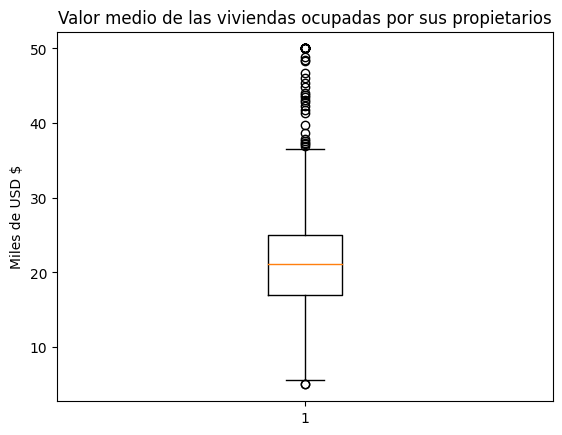

In [34]:
# Para el "Valor medio de las viviendas ocupadas por sus propietarios" proporcione un diagrama de caja (boxplot)
plt.boxplot(df["MEDV"])
plt.title("Valor medio de las viviendas ocupadas por sus propietarios")
plt.ylabel("Miles de USD $")


Los precios de las viviendas presentan una gran dispersión, con algunos valores extremadamente altos.
El diagrama de caja sugiere una ligera asimetría positiva, ya que la cola derecha (valores altos) es más larga que la cola izquierda (valores bajos). Esto indica que hay más viviendas con precios muy altos que con precios muy bajos.

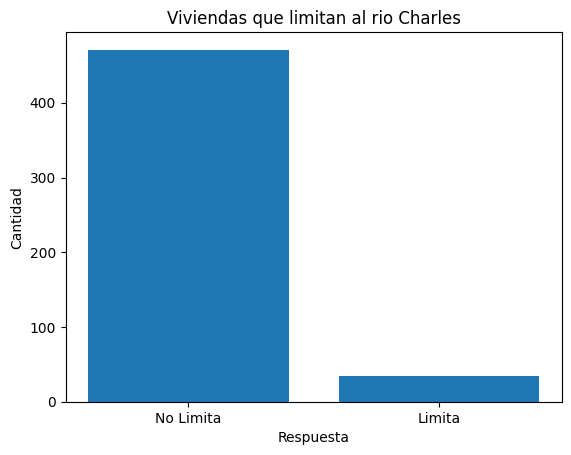

In [35]:
# Proporcione un diagrama de barras para la variable "río Charles
counts = df["CHAS"].value_counts()

plt.bar(counts.index, counts.values)
plt.xticks(counts.index, ['No Limita', 'Limita'])
plt.xlabel('Respuesta')
plt.ylabel('Cantidad')
plt.title('Viviendas que limitan al rio Charles')
plt.show()

La mayoria de las viviendas no limita con el rio Charles

In [36]:
# Agrupar las edades
df.loc[(df["AGE"]<=35),'age_group'] = '35 years and younger'
df.loc[(df["AGE"]>35)&(df["AGE"]<70), 'age_group'] = 'between 35 and 70 years'
df.loc[(df["AGE"]>=70),'age_group'] = '70 years and older'
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


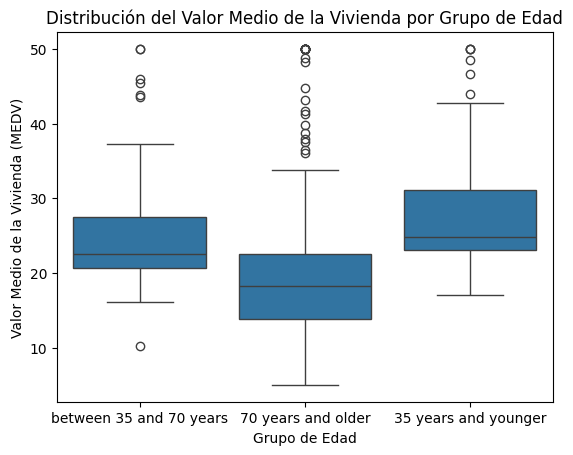

In [37]:
sns.boxplot(x='age_group', y='MEDV', data=df)
plt.xlabel('Grupo de Edad')
plt.ylabel('Valor Medio de la Vivienda (MEDV)')
plt.title('Distribución del Valor Medio de la Vivienda por Grupo de Edad')
plt.show()


Text(0, 0.5, 'Proporción de acres comerciales no minoristas')

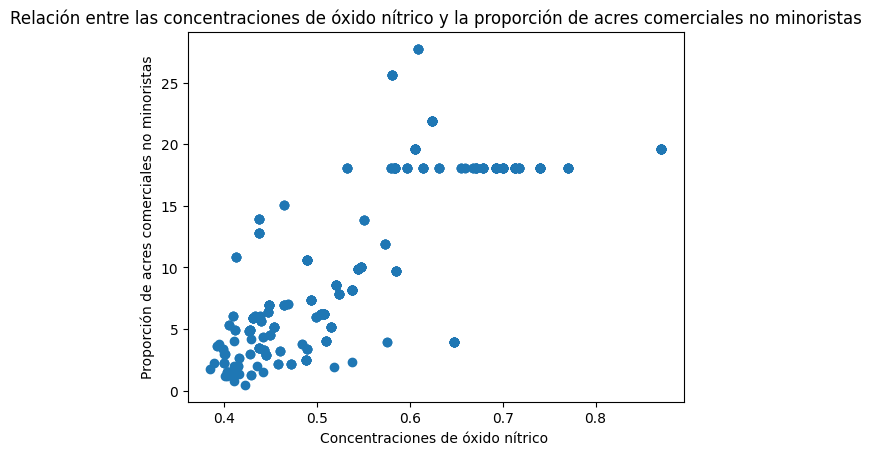

In [38]:
plt.scatter(df["NOX"],df["INDUS"])
plt.title("Relación entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas")
plt.xlabel("Concentraciones de óxido nítrico ")
plt.ylabel("Proporción de acres comerciales no minoristas")

Se evidencia una correlacion positiva entre los niveles de Concentraciones de óxido nítrico y la Proporción de acres comerciales no minoristas

Text(0, 0.5, 'Cantidad alumnos')

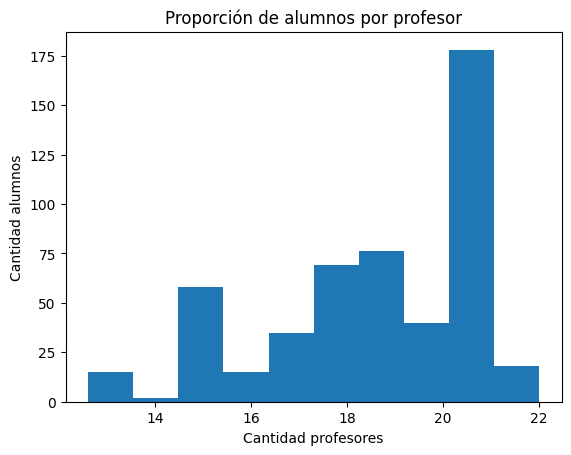

In [39]:
plt.hist(df["PTRATIO"])
plt.title("Proporción de alumnos por profesor")
plt.xlabel("Cantidad profesores")
plt.ylabel("Cantidad alumnos")


# Utilice las pruebas adecuadas para responder a las preguntas que se le plantean.

### ¿Existe una diferencia significativa en el valor medio de las casas delimitadas por el río Charles o no? (Prueba T para muestras independientes)

Plantear la hipótesis

*   $H\_0: µ\_1 = µ\_2$ ("No hay diferencia en el valor medio de las casas delimitadas por el rio Charles")
*   $H\_1: µ\_1 ≠ µ\_2$ ("Hay diferencia en el valor medio de las casas delimitadas por el rio Charles")

<ipython-input-40-35ed4486011b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['MEDV'],


<function matplotlib.pyplot.show(close=None, block=None)>

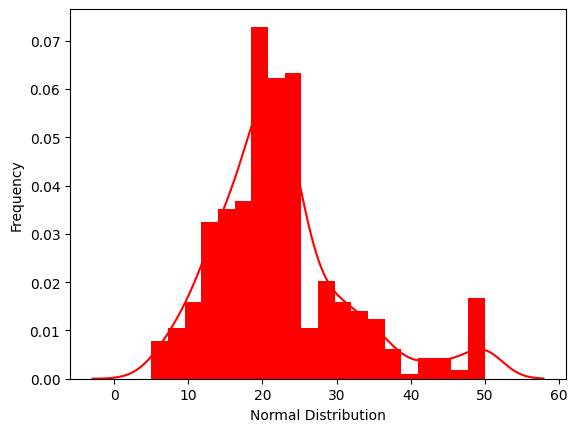

In [40]:
ax = sns.distplot(df['MEDV'],
                  bins=20,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
plt.show
## we can assume it is normal

In [41]:
scipy.stats.levene(df[df['CHAS'] == 0]['MEDV'],
                   df[df['CHAS'] == 1]['MEDV'], center='mean')


LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

como el valor p es inferior a 0,05, las varianzas no son iguales, a efectos de este ejercicio, seguiremos adelante

In [42]:

grupo_A = df[df['CHAS'] == 0]['MEDV']
grupo_B = df[df['CHAS'] == 1]['MEDV']

# Realizar la prueba T
t_statistic, p_value = scipy.stats.ttest_ind(grupo_A, grupo_B, equal_var =False)

print('Estadístico T:', t_statistic)
print('Valor p:', p_value)



alpha = 0.05
if p_value < alpha:
    print('Rechazamos la hipótesis nula. Hay una diferencia significativa entre los grupos.')
else:
    print('No podemos rechazar la hipótesis nula. No hay evidencia suficiente para concluir que hay una diferencia significativa.')

Estadístico T: -3.113291312794837
Valor p: 0.0035671700981375174
Rechazamos la hipótesis nula. Hay una diferencia significativa entre los grupos.


### Rechazamos la hipótesis nula.

###	¿Existe alguna diferencia en los valores medios de las casas (MEDV) para cada proporción de unidades ocupadas por sus propietarios construidas antes de 1940 (AGE)? (ANOVA)

Plantear la hipótesis

*   $H\_0: µ\_1 = µ\_2$ ("No hay diferencia en el valor medio de las casas para cada proporción de unidades ocupadas por sus propietarios construidas antes de 1940 ")
*   $H\_1: µ\_1 ≠ µ\_2$ ("Hay diferencia en el valor medio de las casas para cada proporción de unidades ocupadas por sus propietarios construidas antes de 1940 ")

In [43]:
scipy.stats.levene(df[df['age_group'] == '35 years and younger']['MEDV'],
                   df[df['age_group'] == 'between 35 and 70 years']['MEDV'],
                   df[df['age_group'] == '70 years and older']['MEDV'],
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

como el valor p es superior a 0,05 podemos suponer igualdad de varianza

In [44]:
thirtyfive_lower = df[df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = df[df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = df[df['age_group'] == '70 years and older']['MEDV']

In [45]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


Como el valor p es superior a 0,05, no rechazaremos la hipótesis nula, ya que no hay pruebas significativas de que al menos una de las medias difiera.

### ¿Podemos concluir que no existe relación entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas por ciudad? (Correlación de Pearson)

Plantear la hipótesis

*   $H\_0: µ\_1 = µ\_2$ ("No existe una correlación lineal entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas por ciudad.")
*   $H\_1: µ\_1 ≠ µ\_2$ ("Existe una correlación lineal entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas por ciudad.")

In [46]:
pearson_correlation, p_value = scipy.stats.pearsonr(df['NOX'], df['INDUS'])

print("Pearson Correlation Coefficient:", pearson_correlation)
print("P-Value:", p_value)

Pearson Correlation Coefficient: 0.7636514469209151
P-Value: 7.913361061239527e-98


Rechazamos la hipótesis nula. existe una evidencia estadísticamente significativa de una correlación lineal entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas por ciudad.

### Rechazamos la hipótesis nula.

¿Cuál es el impacto de una distancia ponderada adicional a los cinco centros de empleo de Boston sobre el valor medio de las viviendas ocupadas por sus propietarios? (Análisis de regresión)

In [47]:

X = df['DIS']

y = df['MEDV']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        22:01:34   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

El modelo de regresión lineal simple se ajusta a los datos, aunque el R-cuadrado ajustado (0.061) indica que solo el 6.1% de la variabilidad en MEDV puede ser explicada por la variable DIS. Esto significa que hay una relación débil entre ambas variables.

El coeficiente de DIS (1.0916) es positivo y estadísticamente significativo (p-valor < 0.05). Esto indica que a medida que aumenta la distancia a centros de empleo (DIS), el valor medio de las viviendas (MEDV) también tiende a aumentar. Sin embargo, dado el bajo R-cuadrado, el efecto de DIS en MEDV es relativamente pequeño.